In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [3]:
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [4]:
test.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


In [5]:
train.columns = ['tracking_id', 'datetime', 'wind_speed', 'atmospheric_temperature', 'shaft_temperature', 'blades_angle',
                'gearbox_temperature', 'engine_temperature', 'motor_torque', 'generator_temperature', 'atmospheric_pressure',
                'area_temperature', 'windmill_body_temperature', 'wind_direction', 'resistance', 'rotor_torque',
                'turbine_status', 'cloud_level', 'blade_length', 'blade_breadth', 'windmill_height', 'windmill_generated_power']

# 데이터 확인, 결측치 처리, 기초통계하기

In [6]:
train.shape

(28200, 22)

In [7]:
train.isna().sum()

tracking_id                     0
datetime                        0
wind_speed                    273
atmospheric_temperature      3450
shaft_temperature               2
blades_angle                  216
gearbox_temperature             1
engine_temperature             12
motor_torque                   24
generator_temperature          12
atmospheric_pressure         2707
area_temperature                0
windmill_body_temperature    2363
wind_direction               5103
resistance                      1
rotor_torque                  572
turbine_status               1759
cloud_level                   276
blade_length                 5093
blade_breadth                   0
windmill_height               543
windmill_generated_power      207
dtype: int64

In [8]:
test.isna().sum()

tracking_id                         0
datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tracking_id                28200 non-null  object 
 1   datetime                   28200 non-null  object 
 2   wind_speed                 27927 non-null  float64
 3   atmospheric_temperature    24750 non-null  float64
 4   shaft_temperature          28198 non-null  float64
 5   blades_angle               27984 non-null  float64
 6   gearbox_temperature        28199 non-null  float64
 7   engine_temperature         28188 non-null  float64
 8   motor_torque               28176 non-null  float64
 9   generator_temperature      28188 non-null  float64
 10  atmospheric_pressure       25493 non-null  float64
 11  area_temperature           28200 non-null  float64
 12  windmill_body_temperature  25837 non-null  float64
 13  wind_direction             23097 non-null  flo

In [10]:
train.describe()

,wind_speed,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,windmill_body_temperature,wind_direction,resistance,rotor_torque,blade_length,blade_breadth,windmill_height,windmill_generated_power
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [11]:
set(train["turbine_status"])

{'A',
 'A2',
 'AAA',
 'AB',
 'ABC',
 'AC',
 'B',
 'B2',
 'BA',
 'BB',
 'BBB',
 'BCB',
 'BD',
 'D',
 nan}

In [12]:
set(train["cloud_level"])

{'Extremely Low', 'Low', 'Medium', nan}

In [13]:
train.columns

Index(['tracking_id', 'datetime', 'wind_speed', 'atmospheric_temperature',
       'shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'atmospheric_pressure', 'area_temperature', 'windmill_body_temperature',
       'wind_direction', 'resistance', 'rotor_torque', 'turbine_status',
       'cloud_level', 'blade_length', 'blade_breadth', 'windmill_height',
       'windmill_generated_power'],
      dtype='object')

In [14]:
train = train.drop(['tracking_id', 'datetime', 'shaft_temperature', 'blades_angle', 'gearbox_temperature', 'engine_temperature',
                    'motor_torque', 'generator_temperature', 'windmill_body_temperature', 'resistance', 'rotor_torque', 'turbine_status',
                    'blade_length', 'blade_breadth', 'windmill_height'], axis = 1)

In [15]:
train.columns

Index(['wind_speed', 'atmospheric_temperature', 'atmospheric_pressure',
       'area_temperature', 'wind_direction', 'cloud_level',
       'windmill_generated_power'],
      dtype='object')

In [16]:
train.head()

,wind_speed,atmospheric_temperature,atmospheric_pressure,area_temperature,wind_direction,cloud_level,windmill_generated_power
0,94.820023,-99.000000,103402.961872,26.897875,239.836388,Medium,6.766521
1,241.832734,27.764785,17030.904078,39.801469,337.944723,Medium,5.966275
2,95.484724,NaN,16125.927107,36.116065,227.850294,Medium,2.874342
3,238.819424,-99.000000,18689.732336,46.020045,492.081520,NaN,14.851089
4,10.722890,NaN,114468.169007,34.572941,259.274601,Medium,3.519074


In [17]:
list(train.select_dtypes(include=[np.int64, np.float64]).columns)

['wind_speed',
 'atmospheric_temperature',
 'atmospheric_pressure',
 'area_temperature',
 'wind_direction',
 'windmill_generated_power']

In [18]:
train['wind_speed'].fillna(train['wind_speed'].median(),inplace=True)
train['atmospheric_temperature'].fillna(train['atmospheric_temperature'].median(),inplace=True)
train['atmospheric_pressure'].fillna(train['atmospheric_pressure'].median(),inplace=True)
train['area_temperature'].fillna(train['area_temperature'].median(),inplace=True)
train['wind_direction'].fillna(train['wind_direction'].median(),inplace=True)
train['cloud_level'].fillna(train['cloud_level'].mode()[0],inplace=True)

In [19]:
train.isnull().sum()

wind_speed                    0
atmospheric_temperature       0
atmospheric_pressure          0
area_temperature              0
wind_direction                0
cloud_level                   0
windmill_generated_power    207
dtype: int64

In [20]:
train = train.dropna()

In [21]:
train.describe()

,wind_speed,atmospheric_temperature,atmospheric_pressure,area_temperature,wind_direction,windmill_generated_power
count,27993.000000,27993.000000,2.799300e+04,27993.000000,27993.000000,27993.000000
mean,69.267174,2.294245,4.969926e+04,32.728987,300.343920,6.130529
std,75.995557,41.806432,1.784840e+05,7.703850,121.962942,2.697520
min,-496.211029,-99.000000,-1.188624e+06,-30.000000,0.000000,0.962305
25%,21.225082,9.370953,1.689088e+04,27.311681,246.781153,4.059505
50%,93.302129,16.102410,1.819113e+04,32.592784,271.427656,5.764710
75%,95.248343,22.574933,1.164118e+05,38.213333,331.623967,7.947195
max,601.455670,80.217444,1.272552e+06,55.000000,569.966479,20.175358


In [22]:
train.describe(include = "object")

,cloud_level
count,27993
unique,3
top,Low
freq,14096


# 피처 엔지니어링

In [23]:
# 발전량이 발전량 피처의 중앙값을 넘으면 1, 아니면 0인 windmill_generated_power_b 피처를 생성

train['windmill_generated_power_b'] = 0
train['windmill_generated_power_b'] = np.where(train['windmill_generated_power'] > train['windmill_generated_power'].median(), 1, 0)
train.reset_index(inplace = True, drop = True)

In [24]:
train.windmill_generated_power_b

0        1
1        1
2        0
3        1
4        0
        ..
27988    1
27989    0
27990    1
27991    1
27992    0
Name: windmill_generated_power_b, Length: 27993, dtype: int32

# EDA, 상관관계 분석

In [25]:
train.select_dtypes(include=[np.int64, np.float64]).columns

Index(['wind_speed', 'atmospheric_temperature', 'atmospheric_pressure',
       'area_temperature', 'wind_direction', 'windmill_generated_power'],
      dtype='object')

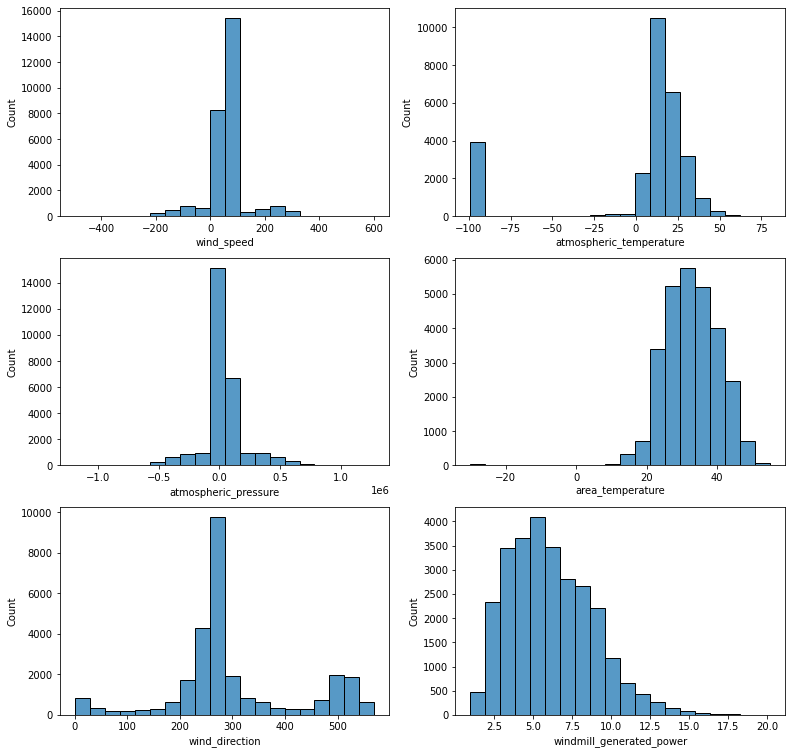

In [26]:
fig, axs = plt.subplots(nrows=3, ncols = 2, figsize=(13, 13))

ax = sns.histplot(x="wind_speed", data=train, ax = axs[0,0], bins= 20)
ax = sns.histplot(x="atmospheric_temperature", data=train, ax = axs[0,1], bins= 20)
ax = sns.histplot(x="atmospheric_pressure", data=train, ax = axs[1,0], bins= 20)
ax = sns.histplot(x="area_temperature", data=train, ax = axs[1,1], bins= 20)
ax = sns.histplot(x="wind_direction", data=train, ax = axs[2,0], bins= 20)
ax = sns.histplot(x="windmill_generated_power", data=train, ax = axs[2,1], bins= 20)

<AxesSubplot:ylabel='windmill_generated_power_b'>

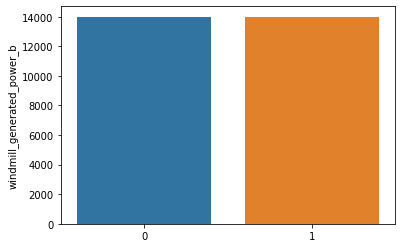

In [28]:
sns.barplot(y = train.windmill_generated_power_b.value_counts(),
           x = train.windmill_generated_power_b.value_counts().index)

In [29]:
train.cloud_level.value_counts()

Low              14096
Medium           13598
Extremely Low      299
Name: cloud_level, dtype: int64

<AxesSubplot:ylabel='cloud_level'>

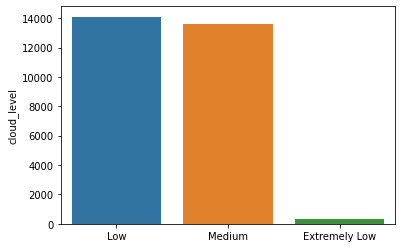

In [30]:
sns.barplot(y = train.cloud_level.value_counts(),
            x = train.cloud_level.value_counts().index)

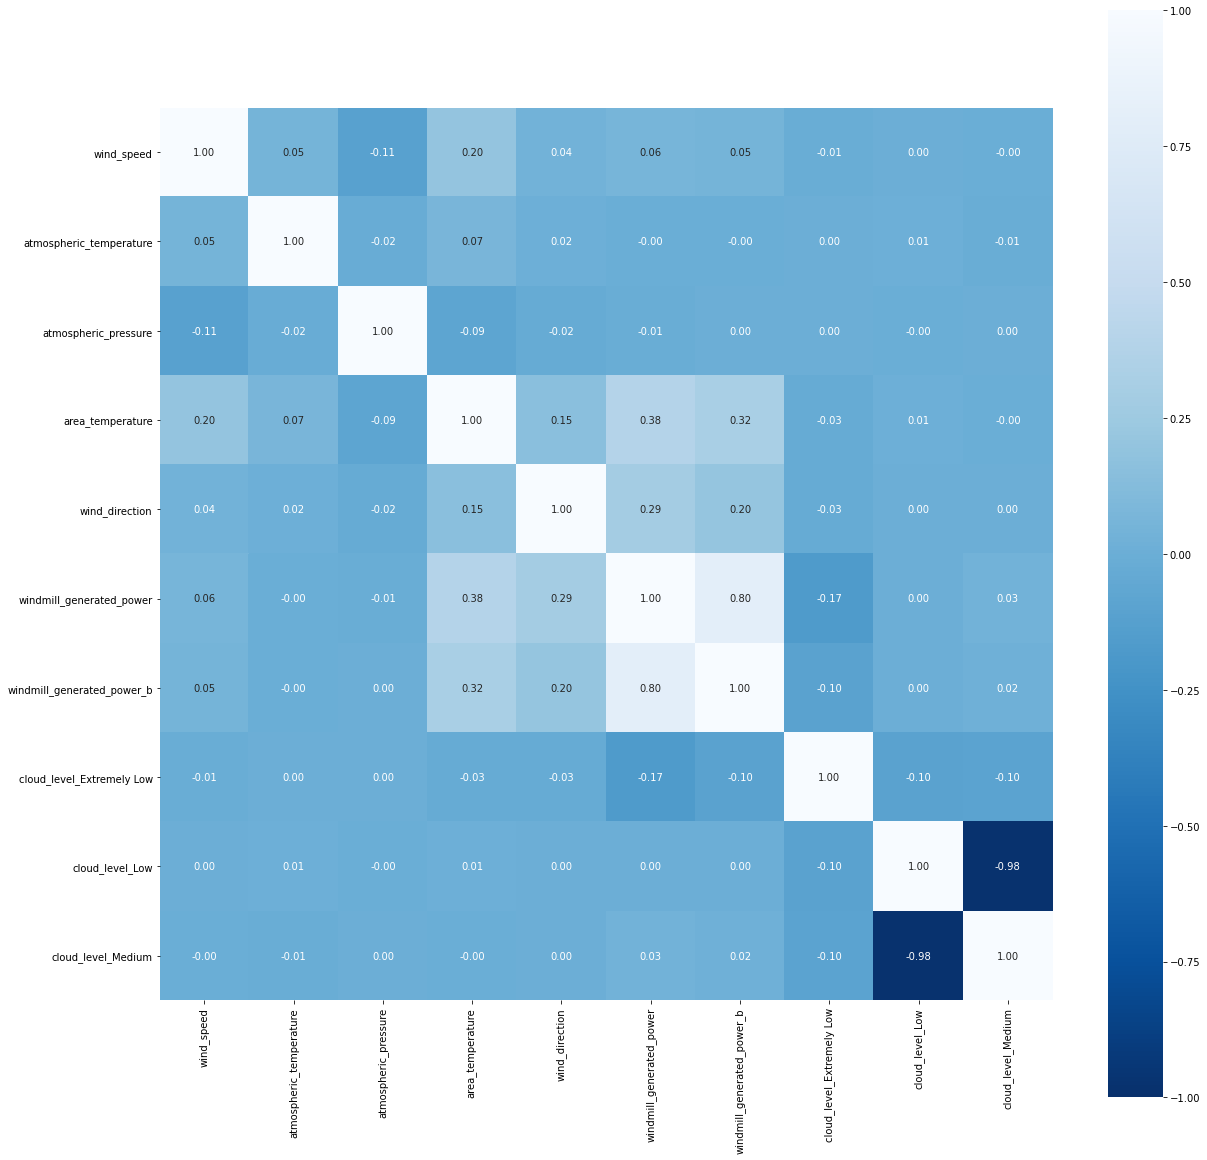

{'corr':                             wind_speed  atmospheric_temperature  \
 wind_speed                    1.000000                 0.048925   
 atmospheric_temperature       0.048925                 1.000000   
 atmospheric_pressure         -0.114342                -0.019450   
 area_temperature              0.196317                 0.066233   
 wind_direction                0.038029                 0.015042   
 windmill_generated_power      0.062324                -0.002432   
 windmill_generated_power_b    0.048664                -0.002845   
 cloud_level_Extremely Low    -0.008441                 0.000214   
 cloud_level_Low               0.004207                 0.008149   
 cloud_level_Medium           -0.002473                -0.008196   
 
                             atmospheric_pressure  area_temperature  \
 wind_speed                             -0.114342          0.196317   
 atmospheric_temperature                -0.019450          0.066233   
 atmospheric_pressure        

In [31]:
from dython import nominal

nominal.associations(pd.get_dummies(train), figsize=(20,20),cmap = "Blues_r")

In [32]:
train.head()

,wind_speed,atmospheric_temperature,atmospheric_pressure,area_temperature,wind_direction,cloud_level,windmill_generated_power,windmill_generated_power_b
0,94.820023,-99.000000,103402.961872,26.897875,239.836388,Medium,6.766521,1
1,241.832734,27.764785,17030.904078,39.801469,337.944723,Medium,5.966275,1
2,95.484724,16.102410,16125.927107,36.116065,227.850294,Medium,2.874342,0
3,238.819424,-99.000000,18689.732336,46.020045,492.081520,Low,14.851089,1
4,10.722890,16.102410,114468.169007,34.572941,259.274601,Medium,3.519074,0


# 모델 학습

In [33]:
X = train.drop(['windmill_generated_power_b', 'windmill_generated_power'], axis = 1)
y = train['windmill_generated_power_b']

In [34]:
X

,wind_speed,atmospheric_temperature,atmospheric_pressure,area_temperature,wind_direction,cloud_level
0,94.820023,-99.000000,103402.961872,26.897875,239.836388,Medium
1,241.832734,27.764785,17030.904078,39.801469,337.944723,Medium
2,95.484724,16.102410,16125.927107,36.116065,227.850294,Medium
3,238.819424,-99.000000,18689.732336,46.020045,492.081520,Low
4,10.722890,16.102410,114468.169007,34.572941,259.274601,Medium
...,...,...,...,...,...,...
27988,94.765699,23.576793,19428.725079,45.429230,536.153413,Medium
27989,94.196738,24.034329,16596.485400,25.142681,354.239825,Low
27990,94.160463,28.674296,19083.881449,45.129442,534.209913,Medium
27991,95.430377,26.560254,18360.785707,45.603927,568.504898,Low


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['wind_speed',
                                    'atmospheric_temperature',
                                    'atmospheric_pressure',
                                    'area_temperature',
                                    'wind_direction']),
                         ("onehot", OneHotEncoder(sparse = False), ['cloud_level'])])

In [36]:
ct.fit(X)
X = ct.transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify = y)  

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

print("k-nn의 학습용 데이터 정확도: {:.2f}".format(knn.score(X_train, y_train)))
print("k-nn의 평가용 데이터 정확도: {:.2f}".format(knn.score(X_test, y_test)))

k-nn의 학습용 데이터 정확도: 0.81
k-nn의 평가용 데이터 정확도: 0.72


In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')

lr.fit(X_train, y_train)

print("로지스틱 회귀분석 학습용 데이터 정확도: {:.2f}".format(lr.score(X_train, y_train)))
print("로지스틱 회귀분석 평가용 데이터 정확도: {:.2f}".format(lr.score(X_test, y_test)))

로지스틱 회귀분석 학습용 데이터 정확도: 0.67
로지스틱 회귀분석 평가용 데이터 정확도: 0.66


In [40]:
from sklearn import svm

svm = svm.SVC(random_state=42)

svm.fit(X_train, y_train)

print("SVM 학습용 데이터 정확도: {:.2f}".format(svm.score(X_train, y_train)))
print("SVM 평가용 데이터 정확도: {:.2f}".format(svm.score(X_test, y_test)))

SVM 학습용 데이터 정확도: 0.71
SVM 평가용 데이터 정확도: 0.69


In [41]:
from sklearn.ensemble import RandomForestClassifier

randomforestclf = RandomForestClassifier(random_state=42)

randomforestclf.fit(X_train, y_train)

print("랜덤 포레스트 학습용 데이터 정확도: {:.2f}".format(randomforestclf.score(X_train, y_train)))
print("랜덤 포레스트 평가용 데이터 정확도: {:.2f}".format(randomforestclf.score(X_test, y_test)))

랜덤 포레스트 학습용 데이터 정확도: 1.00
랜덤 포레스트 평가용 데이터 정확도: 0.84


In [42]:
from sklearn.model_selection import GridSearchCV

params = [{'n_estimators': [10, 100, 1000],
           'max_depth': [1, 5, 10]}
         ]

randomforestclf_gs = GridSearchCV(randomforestclf,
                                  params,
                                  scoring='accuracy',
                                  cv=10,
                                  verbose=2)
randomforestclf_gs.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=1, n_es

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 5, 10],
                          'n_estimators': [10, 100, 1000]}],
             scoring='accuracy', verbose=2)

In [43]:
randomforestclf_gs.best_params_

{'max_depth': 10, 'n_estimators': 1000}

In [44]:
randomforestclf_gs.best_score_

0.8466449198362346

In [45]:
clf = randomforestclf_gs.best_estimator_
print('학습용 데이터 정확도: %.3f' % clf.score(X_train, y_train))
print('평가용 데이터 정확도: %.3f' % clf.score(X_test, y_test))

학습용 데이터 정확도: 0.883
평가용 데이터 정확도: 0.838


In [46]:
y_pred = clf.predict(X_test)
y_true = y_test

In [47]:
X_test_df = pd.DataFrame(X_test)
X_test_df.columns = ['wind_speed', 'atmospheric_temperature', 'atmospheric_pressure', 'area_temperature', 'wind_direction', 'x0_Extremely Low', 'x0_Low', 'x0_Medium']
X_test_df['pred'] = y_pred
X_test_df['true'] = np.array(y_true)

In [48]:
X_test_df

,wind_speed,atmospheric_temperature,atmospheric_pressure,area_temperature,wind_direction,x0_Extremely Low,x0_Low,x0_Medium,pred,true
0,0.309808,0.336690,-0.173368,0.834158,-2.462627,0.0,1.0,0.0,1,1
1,-0.778540,0.068487,0.326189,-1.680104,-0.691470,0.0,1.0,0.0,0,0
2,0.331971,0.795416,1.856165,1.817646,-0.237095,0.0,1.0,0.0,1,0
3,0.345724,0.330294,-0.185271,0.900879,1.398216,1.0,0.0,0.0,0,0
4,0.320479,0.473489,-0.176046,0.167095,1.963229,0.0,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...
8393,0.377860,0.634497,-0.185112,1.672845,0.632790,0.0,0.0,1.0,0,0
8394,0.371233,-2.422978,-0.182963,0.937706,1.327946,0.0,1.0,0.0,0,0
8395,0.359737,0.723926,-0.173383,1.768597,-0.237095,0.0,0.0,1.0,1,1
8396,-0.778458,0.173285,-0.176535,-0.176224,-0.044676,0.0,1.0,0.0,0,0


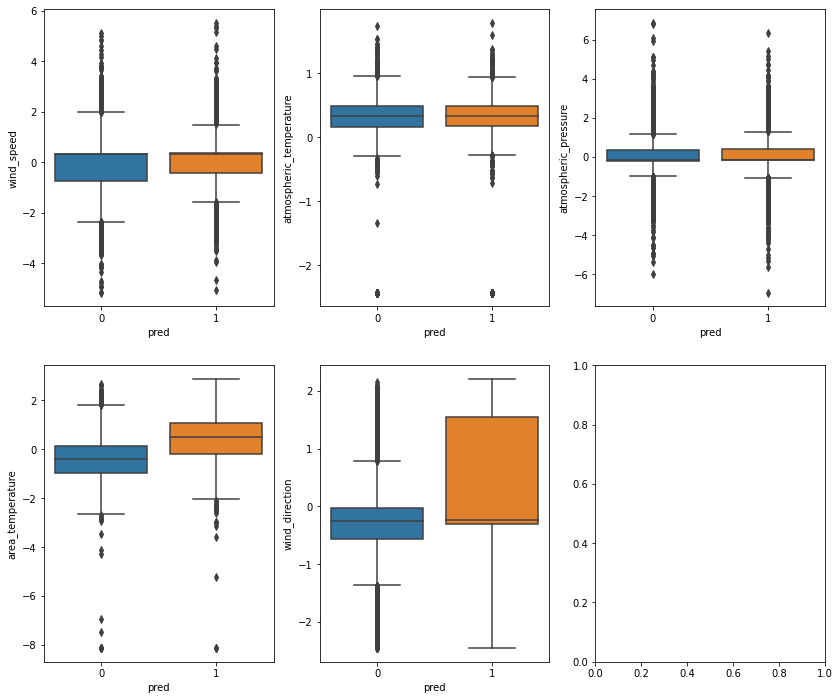

In [49]:
fig, axs = plt.subplots(nrows=2, ncols = 3, figsize=(14,12))

ax = sns.boxplot(x="pred", y="wind_speed", data=X_test_df, ax = axs[0,0])
ax = sns.boxplot(x="pred", y="atmospheric_temperature", data=X_test_df, ax = axs[0,1])
ax = sns.boxplot(x="pred", y="atmospheric_pressure", data=X_test_df, ax = axs[0,2])
ax = sns.boxplot(x="pred", y="area_temperature", data=X_test_df, ax = axs[1,0])
ax = sns.boxplot(x="pred", y="wind_direction", data=X_test_df, ax = axs[1,1])

In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[3518,  681],
       [ 678, 3521]], dtype=int64)

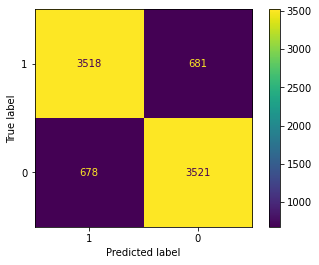

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred),
                              display_labels=['1', '0'])

disp.plot()
plt.show()

In [52]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('마크로 정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='macro'))

마크로 정밀도: 0.838


In [53]:
print('마크로 재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='macro'))

마크로 재현율: 0.838


In [54]:
print('마크로 평균 F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='macro'))

마크로 평균 F1: 0.838


In [55]:
data = pd.read_csv("기상청데이터.csv", encoding='cp949')

region = input("풍력 발전기 설치 적합 여부를 알아볼 지역을 입력하세요.\n")

df = data[data['지점명'] == region]

df.columns = ['지점', '지점명', '일시', '기온', '풍속', '풍향', '현지기압', '최저운고', '지면온도']

df.dropna(inplace = True)

pred = pd.DataFrame()
pred['wind_speed'] = [df['풍속'].mean()]
pred['atmospheric_temperature'] = df['기온'].mean()
pred['atmospheric_pressure'] = df['현지기압'].mean() * 100
pred['area_temperature'] = df['지면온도'].mean()
pred['wind_direction'] = df['풍향'].mean()

if ((df['최저운고'].mean()*100) > 0 & (df['최저운고'].mean()*100 < 2000)):
    pred['cloud_level'] = 'Extremely Low'
elif ((df['최저운고'].mean()*100) >= (2000 & df['최저운고'].mean()*100)) < 6000:
    pred['cloud_level'] = 'Low'
else:
    pred['cloud_level'] = 'Medium'
    
pred = ct.transform(pred)

pred = randomforestclf.predict(pred)    # 부적합

if int(pred) == 1:
    print("{} 지역은 풍력 발전기 설치에 적합합니다.".format(region))
else:
    print("{} 지역은 풍력 발전기 설치에 적합하지 않습니다.".format(region))

풍력 발전기 설치 적합 여부를 알아볼 지역을 입력하세요.
영덕
영덕 지역은 풍력 발전기 설치에 적합하지 않습니다.


C:\Users\ynk99\anaconda3\envs\sunlight\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [58]:
data = pd.read_csv("기상청데이터.csv", encoding='cp949')

region = input("풍력 발전기 설치 적합 여부를 알아볼 지역을 입력하세요.\n")

df = data[data['지점명'] == region]

df.columns = ['지점', '지점명', '일시', '기온', '풍속', '풍향', '현지기압', '최저운고', '지면온도']

df.dropna(inplace = True)

pred = pd.DataFrame()
pred['wind_speed'] = [df['풍속'].mean()]
pred['atmospheric_temperature'] = df['기온'].mean()
pred['atmospheric_pressure'] = df['현지기압'].mean() * 100
pred['area_temperature'] = df['지면온도'].mean()
pred['wind_direction'] = df['풍향'].mean()

if ((df['최저운고'].mean()*100) > 0 & (df['최저운고'].mean()*100 < 2000)):
    pred['cloud_level'] = 'Extremely Low'
elif ((df['최저운고'].mean()*100) >= (2000 & df['최저운고'].mean()*100)) < 6000:
    pred['cloud_level'] = 'Low'
else:
    pred['cloud_level'] = 'Medium'
    
pred = ct.transform(pred)

pred = randomforestclf.predict(pred)    # 부적합

if int(pred) == 1:
    print("{} 지역은 풍력 발전기 설치에 적합합니다.".format(region))
else:
    print("{} 지역은 풍력 발전기 설치에 적합하지 않습니다.".format(region))

풍력 발전기 설치 적합 여부를 알아볼 지역을 입력하세요.
대구
대구 지역은 풍력 발전기 설치에 적합하지 않습니다.


C:\Users\ynk99\anaconda3\envs\sunlight\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
